In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\david\OneDrive\Desktop\ih-labs\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv')

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

In [6]:
pd.crosstab(df['category'], df['isBestSeller'])

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
crosstab_percentage = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
crosstab_percentage

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [9]:
best_seller_proportion = crosstab_percentage[True]
sorted_categories = best_seller_proportion.sort_values(ascending=False)
sorted_categories

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: True, Length: 296, dtype: float64

In [10]:
# Categories like "Grocery," "Smart Home Security & Lighting," and "Health & Personal Care" have relatively high proportions of best-sellers, all around 5-6%. These categories indicate that
# being a best-seller is more prevalent in certain product categories compared to others. 

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

Compute Cramér's V to understand the strength of association between best-seller status and category.

In [13]:
from scipy.stats import chi2_contingency

In [15]:
# Create the contingency table between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


Chi-square statistic: 36540.20270061387
p-value: 0.0
Degrees of freedom: 295


In [ ]:
# Since the p-value is less than any 0.05, we reject the null hypothesis and conclude that there is a significant association between the category and isBestSeller variables. 
# In other words, the distribution of best-sellers is not independent of the product category.

In [16]:
# Compute Cramér's V
n = crosstab.values.sum()  # Total number of observations
min_categories = min(crosstab.shape) - 1  # Minimum of rows or columns minus 1
v = np.sqrt(chi2 / n / min_categories) # V formula

print("Cramér's V:", v)

Cramér's V: 0.1222829439760564


In [ ]:
# Cramér's V value of approximately 0.122 indicates a weak association between the best-seller status and the product category. 
# This means that the best-seller status is not strongly dependent on the product category, but there is still some level of association present.

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

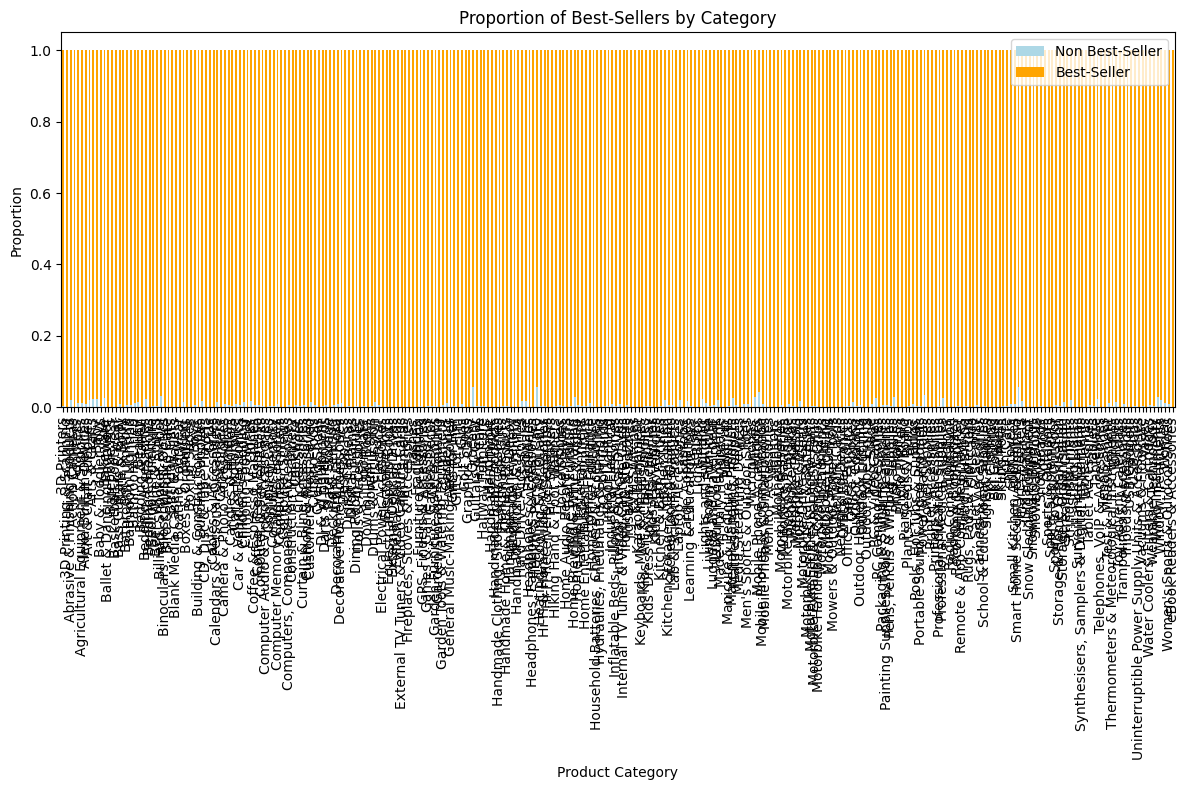

In [17]:
# Proportion of best-sellers for each category
total_per_category = crosstab.sum(axis=1)  # Total number of products per category
proportion_best_seller = crosstab[True] / total_per_category

plt.figure(figsize=(12, 8))
proportion_best_seller.plot(kind='bar', color='lightblue', label='Non Best-Seller')
(crosstab[False] / total_per_category).plot(kind='bar', bottom=proportion_best_seller, color='orange', label='Best-Seller')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.title('Proportion of Best-Sellers by Category')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# The previous chart is virtually impossible to read because there are many many categories. Therefore, I will plot the top 5 categories based on the proportion of best-sellers.

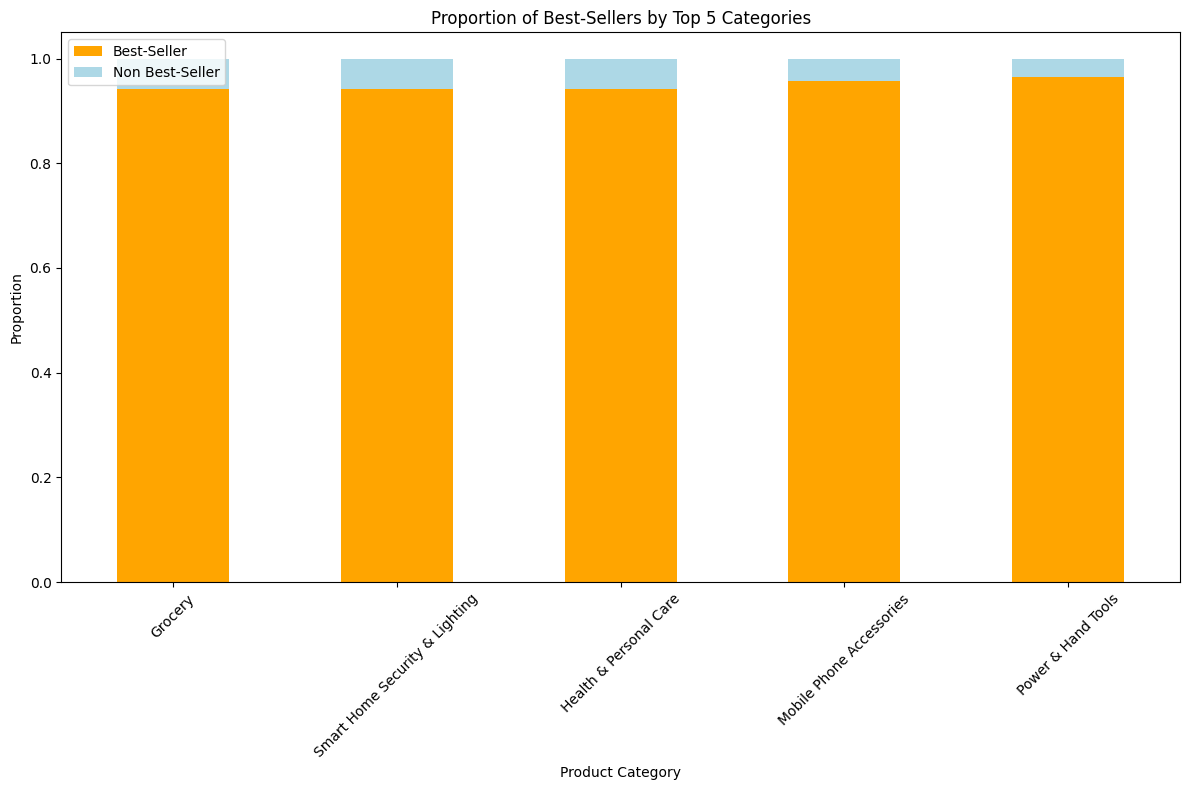

In [20]:
# Select the top 5 categories 
top_5_categories = proportion_best_seller.nlargest(5).index

# Filter the crosstab to include only the top 5 categories
crosstab_top_5 = crosstab.loc[top_5_categories]

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
(crosstab_top_5[False] / total_per_category[top_5_categories]).plot(kind='bar', color='orange', label='Best-Seller')
(crosstab_top_5[True] / total_per_category[top_5_categories]).plot(kind='bar', bottom=(crosstab_top_5[False] / total_per_category[top_5_categories]), color='lightblue', label='Non Best-Seller')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.title('Proportion of Best-Sellers by Top 5 Categories')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [21]:
# Creating a df with no outliers

# Calculate Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.


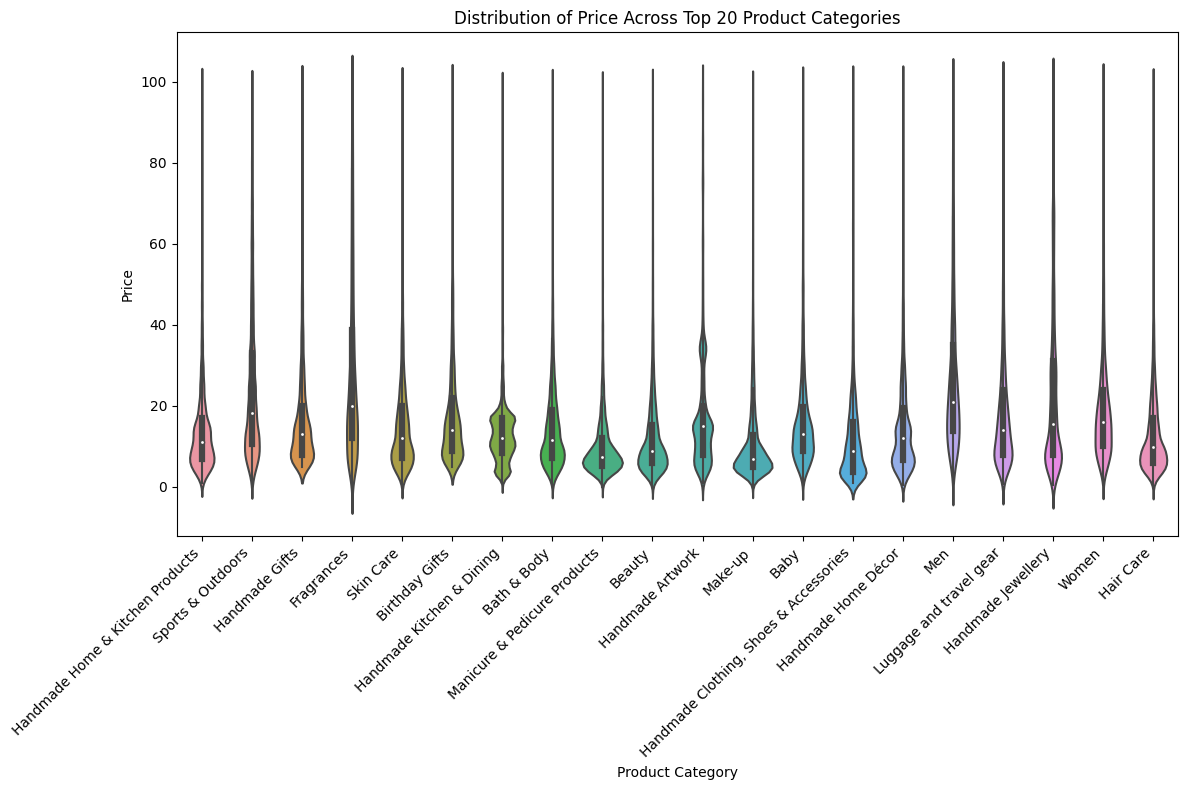

In [22]:
top_20_categories = df_no_outliers['category'].value_counts().nlargest(20).index
df_no_outliers_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_no_outliers_top_20)
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Which product category tends to have the highest median price? Don't filter here by top categories.

In [23]:
median_price_by_category = df_no_outliers.groupby('category')['price'].median()

# Identify the category with the highest median price
category_with_highest_median_price = median_price_by_category.idxmax()
highest_median_price = median_price_by_category.max()

print("Category with the highest median price:", category_with_highest_median_price)
print("Highest median price:", highest_median_price)

Category with the highest median price: Desktop PCs
Highest median price: 74.0


Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

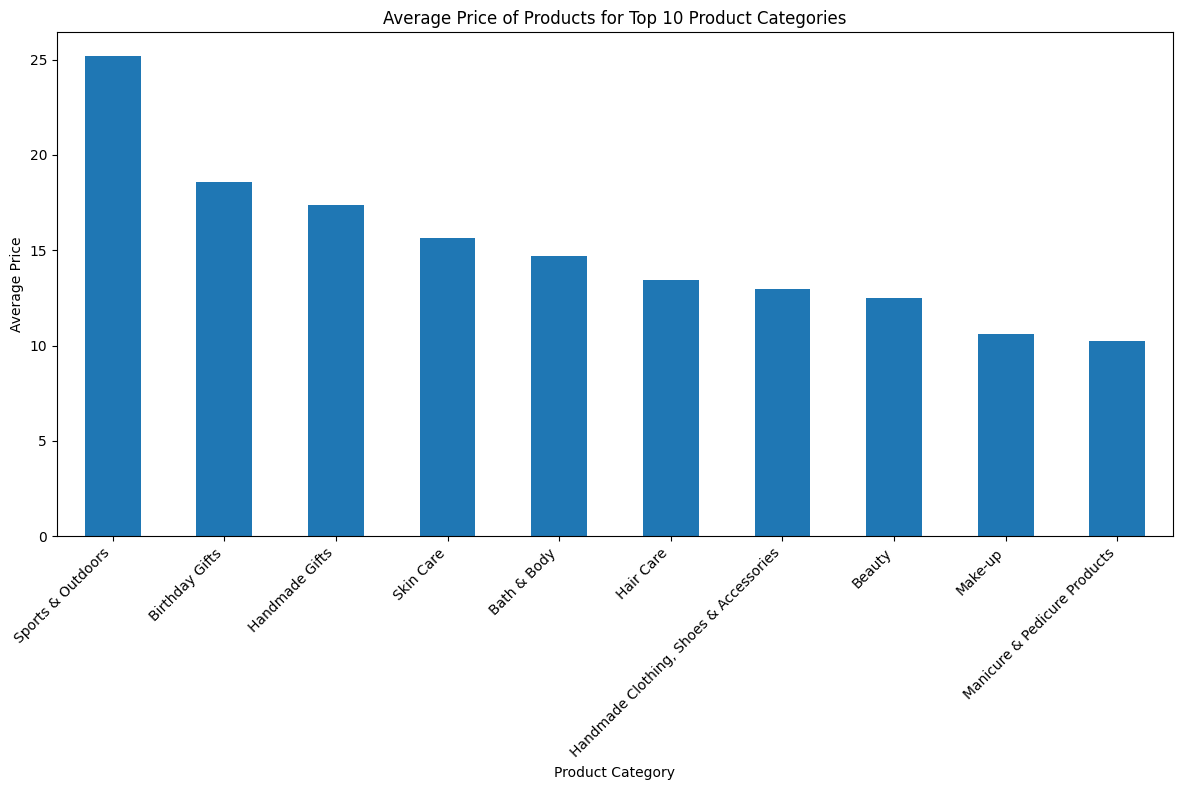

In [26]:
average_price_by_category = df_no_outliers.groupby('category')['price'].mean()

# Sort the categories based on count and select the top 10
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
average_price_top_10 = average_price_by_category[top_10_categories]
average_price_top_10_sorted = average_price_top_10.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
average_price_top_10_sorted.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Which product category commands the highest average price? Don't filter here by top categories.

In [31]:
mean_price_by_category = df_no_outliers.groupby('category')['price'].mean()

# Identify the category with the highest mean price
category_with_highest_mean_price = mean_price_by_category.idxmax()
highest_mean_price = mean_price_by_category.max()

print("Category with the highest median price:", category_with_highest_mean_price)
print("Highest median price:", highest_mean_price)

Category with the highest median price: Motherboards
Highest median price: 68.77243243243242


Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

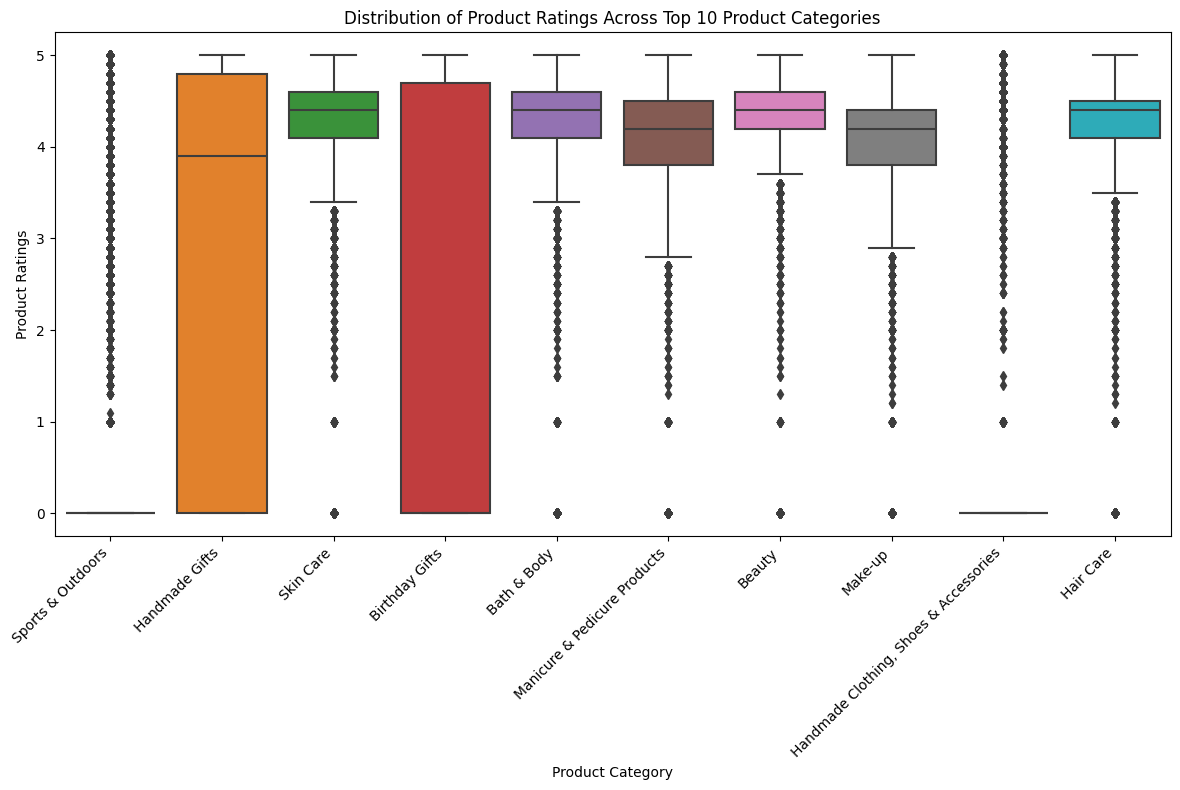

In [32]:
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
df_no_outliers_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_no_outliers_top_10)
plt.xlabel('Product Category')
plt.ylabel('Product Ratings')
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# I think the plot looks weird for some of the product categories because most of the stars are 0 (as we saw on the previous lab).

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [38]:
median_stars_by_category = df_no_outliers.groupby('category')['stars'].median()

# Identify the category with the highest median stars
category_with_highest_median_stars = median_stars_by_category.idxmax()
highest_median_stars = median_stars_by_category.max()

print("Category with the highest median price:", category_with_highest_median_stars)
print("Highest median price:", highest_median_stars)

Category with the highest median price: Computer Memory
Highest median price: 4.7


Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [39]:
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])

print("Correlation Coefficient between Price and Stars:", correlation_coefficient)

Correlation Coefficient between Price and Stars: -0.0776729987818137


In [ ]:
# Since the coefficient is close to 0, it suggests a very weak negative correlation between the price of products and their ratings. This means that there is a slight tendency 
# for products with higher prices to have slightly lower ratings, and vice versa. 

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

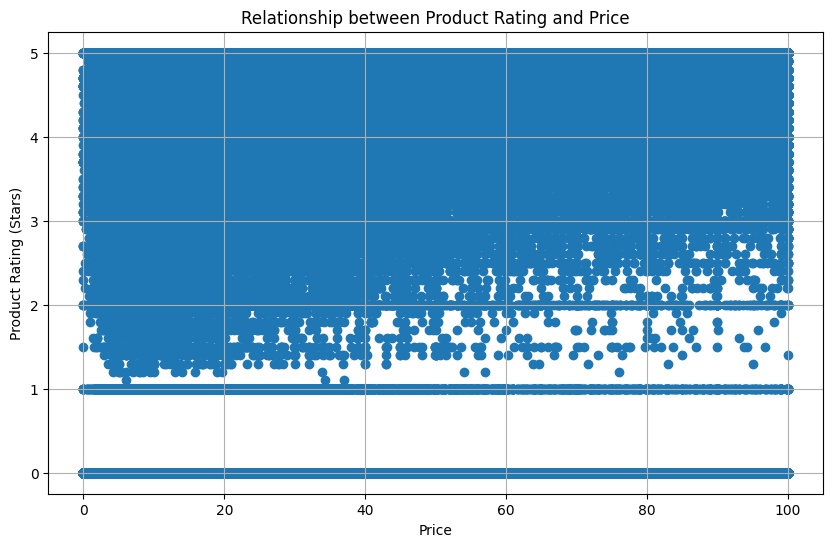

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['price'], df_no_outliers['stars'])
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Product Rating (Stars)')
plt.grid(True)
plt.show()

In [ ]:
# The points are scattered randomly without any noticeable pattern, it suggests that there's no significant relationship between price and rating.

Use a correlation heatmap to visualize correlations between all numerical variables.

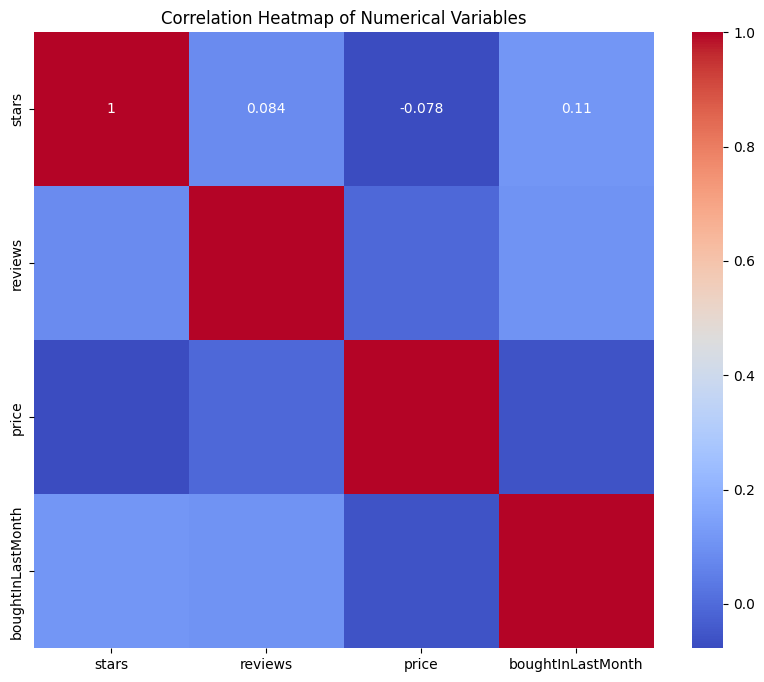

In [55]:
numerical_df = df_no_outliers.select_dtypes(include=['float64', 'int64']).drop(columns=['uid'])

# Compute the correlation matrix
corr = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Examine if product prices typically follow a normal distribution using a QQ plot.

In [56]:
import scipy.stats as stats

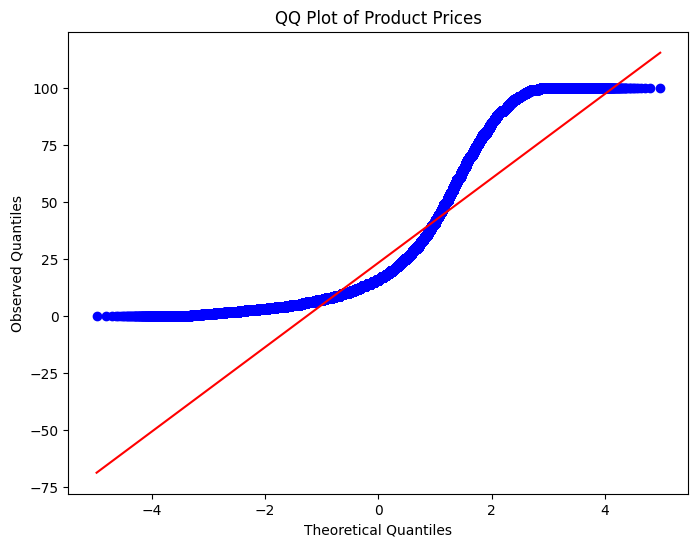

In [58]:
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Quantiles')
plt.show()

In [ ]:
# It seems that the product prices does not follow a normal distribution.